<a href="https://colab.research.google.com/github/rafiafsan/Machine-Learning-Models/blob/main/NN_lab_mid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [36]:
# Drop columns with too many missing values
threshold = 0.3
drop_cols = [col for col in df.columns if df[col].isnull().mean() > threshold]
df.drop(columns=drop_cols, inplace=True)

# Fill missing numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-36-c577cf00fa96>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-36-c577cf00fa96>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [37]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [38]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


In [39]:
df.isnull().sum()/df.shape[0]*100

,0
Date,0.0
Location,0.0
MinTemp,0.0
MaxTemp,0.0
Rainfall,0.0
WindGustDir,0.0
WindGustSpeed,0.0
WindDir9am,0.0
WindDir3pm,0.0
WindSpeed9am,0.0


In [40]:
df['Date'] = pd.to_datetime(df['Date'])

# Create new features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original Date
df.drop('Date', axis=1, inplace=True)

In [42]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,...,24.0,1024.6,1020.3,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,...,21.0,1023.5,1019.1,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,...,24.0,1021.0,1016.8,12.5,26.1,No,No,2017,6,23
145458,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,...,24.0,1019.4,1016.5,15.1,26.0,No,No,2017,6,24


In [10]:
for column in df.columns:
    if df[column].dtype == 'object':
        # Fill categorical columns with mode
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        # Fill numeric columns with median
        df[column] = df[column].fillna(df[column].median())


In [43]:
# Update categorical columns after dropping 'Date'
categorical_cols = df.select_dtypes(include=['object']).columns

In [44]:
# Now safe to do One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [46]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [47]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
0,0.189757,-0.044575,-0.203581,0.307739,0.673596,0.611499,0.111308,-1.443652,-1.478015,-1.223012,...,False,False,False,False,True,False,True,False,True,False
1,-0.752786,0.265794,-0.275097,0.307739,-1.131913,0.382054,-1.320650,-1.297105,-1.047010,-1.117969,...,False,False,False,False,False,True,True,False,True,False
2,0.111212,0.350440,-0.275097,0.460168,0.560752,0.840944,-1.638863,-1.052860,-1.492877,-0.982915,...,False,False,False,False,False,True,True,False,True,False
3,-0.470023,0.674917,-0.275097,-1.216548,-0.342003,-1.109339,-1.267615,-1.736746,-0.006653,-0.367666,...,False,False,False,False,False,False,True,False,True,False
4,0.833828,1.281548,-0.155903,0.079096,-0.793380,0.152609,0.694699,-0.906314,-1.017286,-1.388078,...,False,False,False,False,False,False,True,False,True,False


In [48]:
# y becomes 'RainTomorrow_Yes'
y = df['RainTomorrow_Yes']

# Drop both one-hot encoded RainTomorrow columns from features
X = df.drop(['RainTomorrow_No', 'RainTomorrow_Yes'], axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)

Training Set: (116368, 114)
Testing Set: (29092, 114)


In [49]:
# Build the ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7931 - loss: 1.6906 - val_accuracy: 0.8310 - val_loss: 0.3878
Epoch 2/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8213 - loss: 0.4271 - val_accuracy: 0.8329 - val_loss: 0.3828
Epoch 3/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8292 - loss: 0.4047 - val_accuracy: 0.8425 - val_loss: 0.3663
Epoch 4/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8300 - loss: 0.3950 - val_accuracy: 0.8423 - val_loss: 0.3660
Epoch 5/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8349 - loss: 0.3850 - val_accuracy: 0.8424 - val_loss: 0.3705
Epoch 6/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8371 - loss: 0.3800 - val_accuracy: 0.8422 - val_loss: 0.3677
Epoch 7/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8400 - loss: 0.3759 - val_accuracy: 0.8405 - val_loss: 0.3714
Epoch 8/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8390 - loss: 0

In [52]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8459 - loss: 0.3532
Test Accuracy: 84.78%


In [53]:
import matplotlib.pyplot as plt

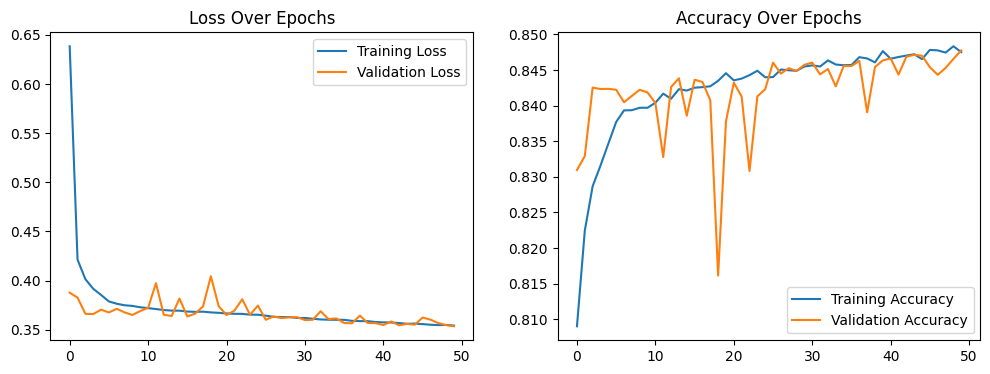

In [54]:
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()

In [55]:
# Make predictions
y_pred_probs = model.predict(X_test)

910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [56]:
threshold = 0.8  # 80% threshold
y_pred = (y_pred_probs >= threshold).astype(int)

In [59]:
from sklearn.metrics import classification_report

# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

       False       0.86      0.96      0.91     22672
        True       0.76      0.46      0.57      6420

    accuracy                           0.85     29092
   macro avg       0.81      0.71      0.74     29092
weighted avg       0.84      0.85      0.83     29092



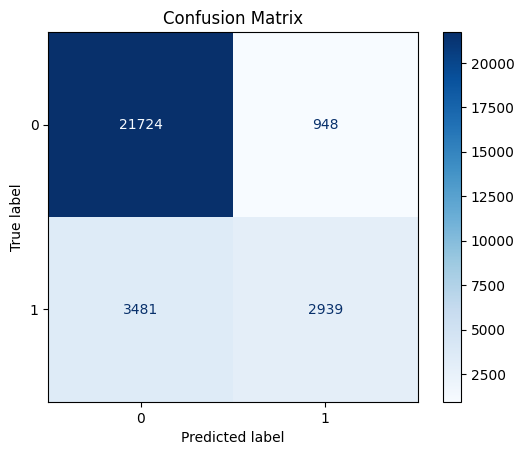

In [60]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()